## Data Loading and Exploration

Loading the CIFAR-10 dataset:

In [1]:
import os
from keras.datasets import cifar10
(x_train, y_train), (x_test, y_test) = cifar10.load_data();

Examining the dataset:

In [2]:
print('x_train shape:', x_train.shape)
print('y_train shape:', y_train.shape)

x_train shape: (50000, 32, 32, 3)
y_train shape: (50000, 1)


This is the datashape of array and it consists of 5000 images.

## Visualizing some images:

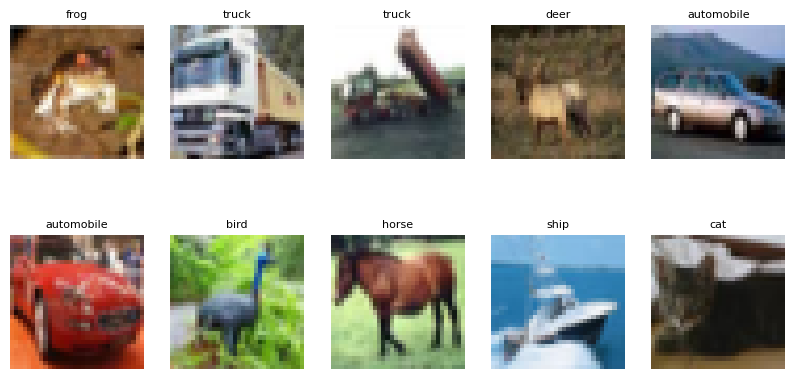

In [15]:
import matplotlib.pyplot as plt
labels = ['airplane', 'automobile', 'bird', 'cat', 'deer', 
          'dog', 'frog', 'horse', 'ship', 'truck']
fig, axes = plt.subplots(2, 5, figsize=(10, 5))
axes = axes.ravel()
for i in range(0, 10):

    axes[i].imshow(x_train[i])
    label_index = int(y_train[i])
    axes[i].set_title(labels[label_index], fontsize = 8)
    axes[i].axis('off')
    
plt.show();

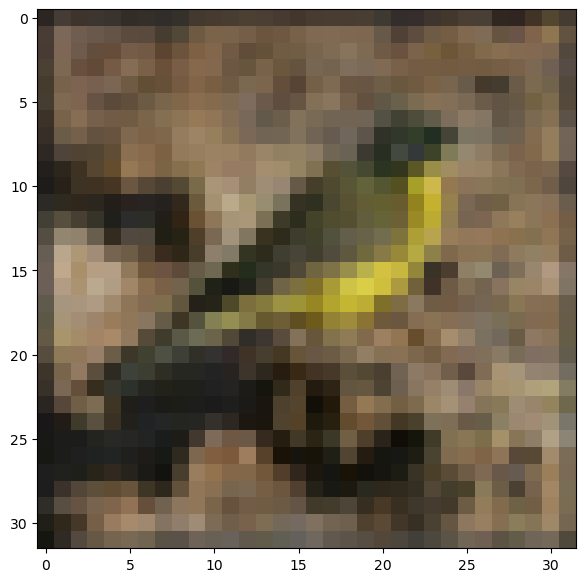

In [58]:
%matplotlib inline
img = plt.imshow(x_train[701])

## Data Preprossesing

Normalizing the image data:

In [59]:
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train = x_train / 255
x_test = x_test / 255

In [60]:
import keras
y_train_one_hot = keras.utils.to_categorical(y_train, 10)
y_test_one_hot = keras.utils.to_categorical(y_test, 10)

In [61]:
print('The one hot label is:', y_train_one_hot[1])

The one hot label is: [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]


## Model Building

In [73]:
import tensorflow as tf
from tensorflow import keras
def create_model():
    model = tf.keras.Sequential([
        keras.layers.Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=(32,32,3)),
        keras.layers.Conv2D(32, (3, 3), activation='relu', padding='same'),
        keras.layers.MaxPooling2D(pool_size=(2, 2)),
        keras.layers.Dropout(0.25),
        keras.layers.Conv2D(64, (3, 3), activation='relu', padding='same'),
        keras.layers.Conv2D(64, (3, 3), activation='relu', padding='same'),
        keras.layers.MaxPooling2D(pool_size=(2, 2)),
        keras.layers.Dropout(0.25),
        keras.layers.Flatten(),
        keras.layers.Dense(512, activation='relu'),
        keras.layers.Dropout(0.5),
        keras.layers.Dense(10, activation='softmax')
  ])

    model.compile(optimizer='adam',
                loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                metrics=[tf.keras.metrics.SparseCategoricalAccuracy()])

    return model

# Create a basic model instance
model = create_model()

# Display the model's architecture
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_16 (Conv2D)          (None, 32, 32, 32)        896       
                                                                 
 conv2d_17 (Conv2D)          (None, 32, 32, 32)        9248      
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 16, 16, 32)       0         
 2D)                                                             
                                                                 
 dropout_12 (Dropout)        (None, 16, 16, 32)        0         
                                                                 
 conv2d_18 (Conv2D)          (None, 16, 16, 64)        18496     
                                                                 
 conv2d_19 (Conv2D)          (None, 16, 16, 64)        36928     
                                                      

In [63]:
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

## Training and saving

In [64]:
checkpoint_path = "training/cp.ckpt"
checkpoint_dir = os.path.dirname(checkpoint_path)

cp_callback = tf.keras.callbacks.ModelCheckpoint(filepath=checkpoint_path,
                                                 save_weights_only=True,
                                                 verbose=1)


In [12]:
hist = model.fit(x_train, y_train_one_hot, 
           batch_size=32, epochs=20, 
           validation_split=0.2,
           callbacks=[cp_callback])

Epoch 1/20
1250/1250 [==============================] - ETA: 0s - loss: 1.5536 - accuracy: 0.4317
Epoch 1: saving model to training/cp.ckpt
1250/1250 [==============================] - 176s 141ms/step - loss: 1.5536 - accuracy: 0.4317 - val_loss: 1.1416 - val_accuracy: 0.5947
Epoch 2/20
1250/1250 [==============================] - ETA: 0s - loss: 1.1365 - accuracy: 0.5961
Epoch 2: saving model to training/cp.ckpt
1250/1250 [==============================] - 182s 145ms/step - loss: 1.1365 - accuracy: 0.5961 - val_loss: 0.9702 - val_accuracy: 0.6530
Epoch 3/20
1250/1250 [==============================] - ETA: 0s - loss: 0.9791 - accuracy: 0.6524
Epoch 3: saving model to training/cp.ckpt
1250/1250 [==============================] - 186s 149ms/step - loss: 0.9791 - accuracy: 0.6524 - val_loss: 0.8817 - val_accuracy: 0.6856
Epoch 4/20
1250/1250 [==============================] - ETA: 0s - loss: 0.8747 - accuracy: 0.6926
Epoch 4: saving model to training/cp.ckpt
1250/1250 [==================

## Evaluation

In [14]:
scores = model.evaluate(x_test, y_test_one_hot, verbose=1)
print('Test loss:', scores[0])
print('Test accuracy:', scores[1])

313/313 [==============================] - 9s 28ms/step - loss: 0.7387 - accuracy: 0.7720
Test loss: 0.7386618852615356
Test accuracy: 0.7720000147819519


## Visualizing confusion matrix:

313/313 [==============================] - 8s 26ms/step


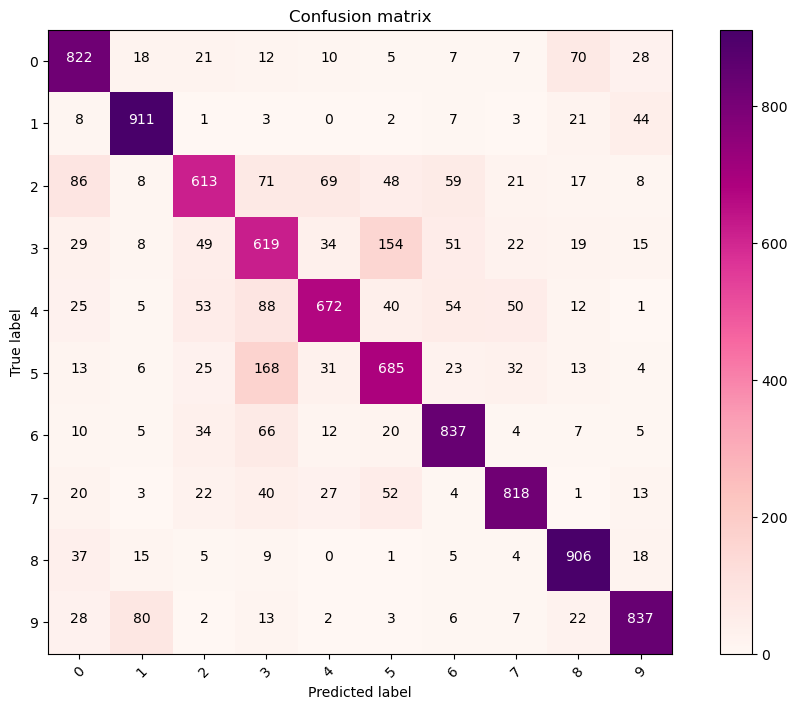

In [16]:
from sklearn.metrics import confusion_matrix, classification_report
import numpy
import itertools
plt.rcParams['figure.figsize'] = [10,7]

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.RdPu):


    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = numpy.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()


p_test = model.predict(x_test).argmax(axis=1)
cm = confusion_matrix(y_test, p_test)
plot_confusion_matrix(cm, list(range(10)));

## Making predictions:

In [39]:
classes = [0,1,2,3,4,5,6,7,8,9]
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']


dt = dict(zip(classes, class_names))

1/1 [==============================] - 0s 26ms/step
True class: frog 

Predicted class: frog


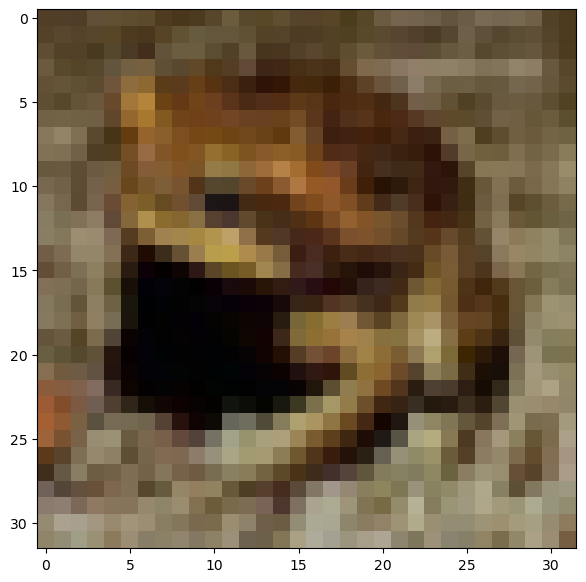

In [40]:
my_image = x_test[300]

plt.imshow(my_image)

input_img = my_image.reshape(1,32,32,3)

predictions = numpy.argmax(model.predict(input_img), axis=-1)[0]

print(f"True class: {dt[y_test[300][0]]} \n\nPredicted class: {dt[predictions]}");

## Conclusion

Using this model I achieved 77% accuracy.

,dataset,score
0,train,0.86
1,test,0.77


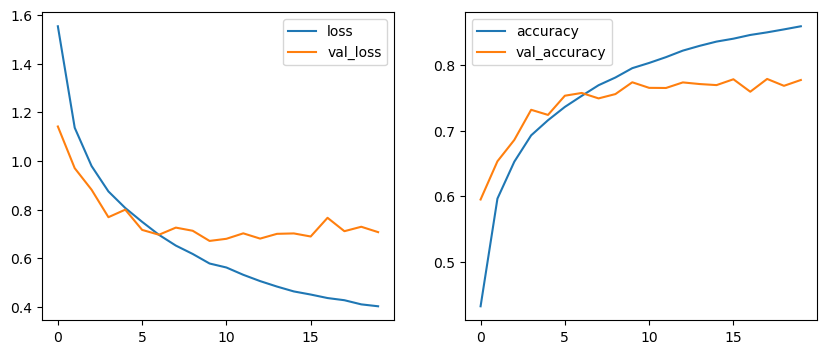

In [71]:
import pandas as pd
fig, ax = plt.subplots(1, 2, figsize = (10,4))

history_df = pd.DataFrame(hist.history)
history_df[['loss', 'val_loss']].plot(kind='line', ax = ax[0])
history_df[['accuracy', 'val_accuracy']].plot(kind = 'line', ax=ax[1]);
pd.DataFrame({'dataset': ['train','test'],'score':[.86,.77]})